In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.decomposition import PCA

# Load The Data Set

In [79]:
data = pd.read_excel('marriage.xlsx',header=5)
data.head()

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3


In [80]:
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2


# Cleaning Process

In [31]:
data.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9,9.4,9.3,8.9,8.7,9.9,10.9


In [32]:
data = data.replace('---',np.nan)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9.0,9.4,9.3,8.9,8.7,9.9,10.9


In [33]:
data.fillna(data.median(numeric_only=True),inplace=True) #get only numeric data
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.10,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.90,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.50,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.40,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.80,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.30,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.70,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.50,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.90,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9.0,9.4,9.3,8.90,8.7,9.9,10.9


# Analysis

In [34]:
#Extract to Matrix

yearM = data.columns[1:].to_numpy().astype(float)
stateM = data.iloc[:,0]
M = data.iloc[:,1:].to_numpy()
M

array([[ 6.69768732,  6.76040755,  7.0473401 , ..., 10.8       ,
         9.8       , 10.6       ],
       [ 6.51224463,  6.68395174,  6.91407755, ...,  8.6       ,
         9.        , 10.2       ],
       [ 5.30299502,  5.5344338 ,  5.83486667, ...,  8.2       ,
         8.8       , 10.        ],
       ...,
       [ 5.97886223,  6.06700956,  6.31162035, ...,  7.5       ,
         6.1       ,  7.2       ],
       [ 5.03724044,  5.43005603,  5.63456057, ...,  6.7       ,
         7.        ,  7.9       ],
       [ 7.00809836,  7.05165153,  7.12565703, ...,  9.9       ,
        10.6       , 10.7       ]])

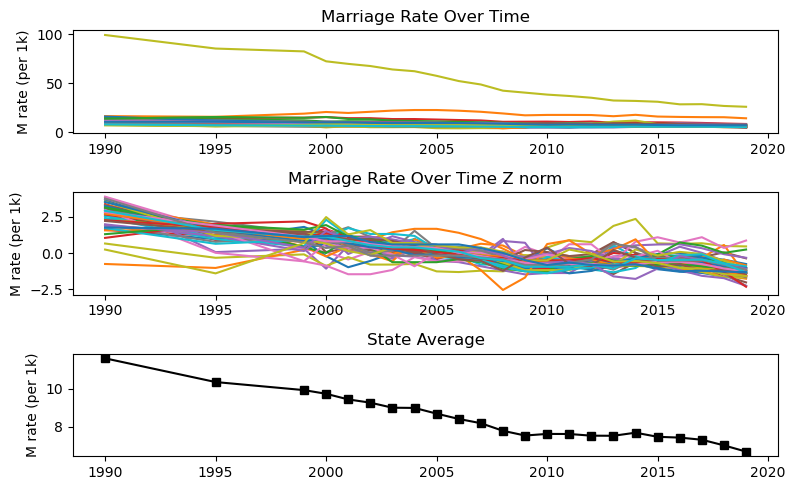

In [35]:
#Make Some Plots

fig,ax = plt.subplots(3,1,figsize=(8,5))

ax[0].plot(yearM,M.T)
ax[0].set_title('Marriage Rate Over Time')
ax[0].set_ylabel('M rate (per 1k)')

ax[1].plot(yearM,stats.zscore(M.T))
ax[1].set_title('Marriage Rate Over Time Z norm')
ax[1].set_ylabel('M rate (per 1k)')

ax[2].plot(yearM,np.mean(M,axis=0),'ks-')
ax[2].set_title('State Average')
ax[2].set_ylabel('M rate (per 1k)')

plt.tight_layout()
plt.show()

In [36]:
meanM = np.mean(M,axis=1)
sinM = np.argsort(meanM)

In [37]:
meanM

array([ 8.66214617,  7.96626378,  6.52203674, 11.84615666,  6.26900344,
        7.5445386 ,  5.65130664,  6.00604285,  6.78393251,  8.32088568,
        6.99206978, 18.3119983 ,  9.74656206,  6.2116219 ,  7.32891628,
        6.84681698,  6.74838136,  8.42548302,  7.27189114,  7.94070218,
        6.66562802,  5.93560441,  6.10611667,  5.99048123,  6.35980892,
        7.06388375,  7.59233254,  6.83664216, 50.32289676,  7.50891741,
        5.63914628,  6.96652681,  7.09808813,  7.15180648,  6.52765902,
        6.45172763,  7.2795886 ,  7.08653654,  5.7460886 ,  6.82439382,
        8.45240286,  7.9766797 , 10.57164091,  7.71328474,  9.19659999,
        8.96327011,  7.75572571,  6.62789308,  7.03476565,  5.93216411,
        8.57892664])

In [38]:
stateM

1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5             California 1
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Mexico
33                New York
34          North Carolina
35            North Dakota
36                    Ohio
37                Oklahoma
3

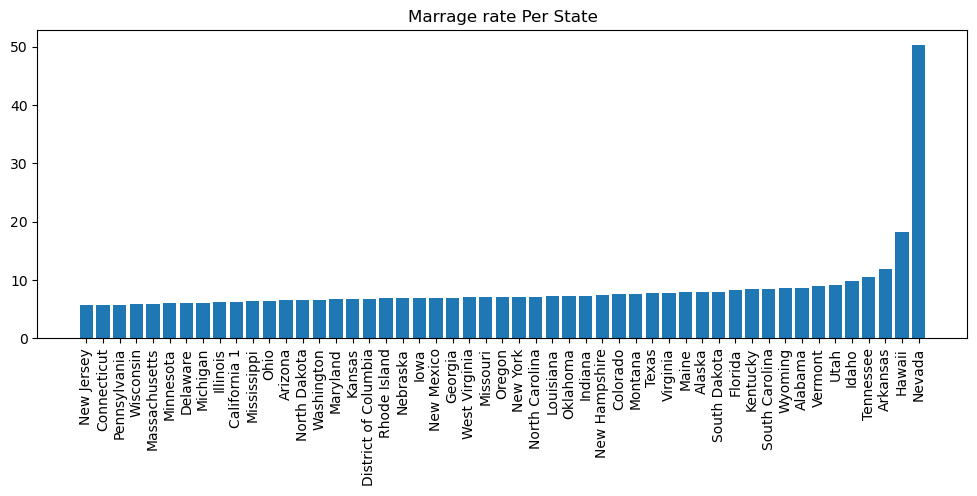

In [39]:
fig=plt.figure(figsize=(12,4))
plt.bar(stateM.iloc[sinM],meanM[sinM])
plt.xticks(rotation=90)
plt.title('Marrage rate Per State')
plt.show()

#Q
#is Navada a non representative data Or Error ?

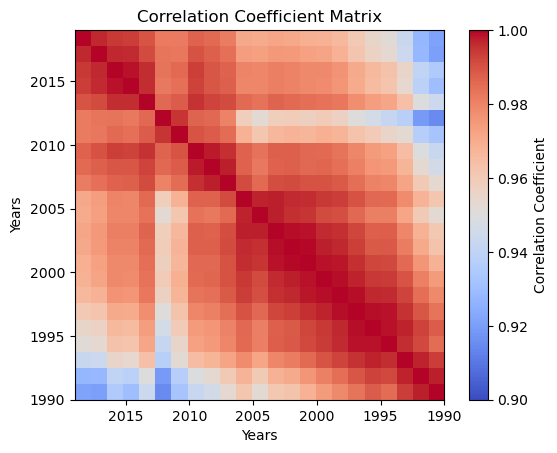

In [40]:
#Correlation Matrix
corr_matrix = np.corrcoef(M.T)

# Plotting the correlation matrix
plt.imshow(corr_matrix, vmin=0.9, vmax=1, extent=[yearM[0], yearM[-1], yearM[-1], yearM[0]], cmap='coolwarm')
plt.colorbar(label='Correlation Coefficient')
plt.xlabel('Years')
plt.ylabel('Years')
plt.title('Correlation Coefficient Matrix')
plt.show()

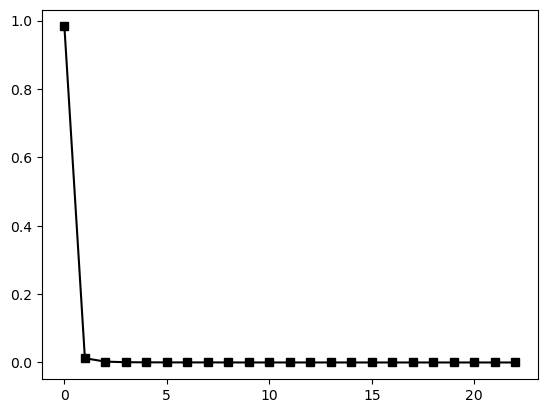

In [41]:
# PCA
pca = PCA().fit(M)
plt.plot(pca.explained_variance_ratio_,'ks-')
plt.show()

# Divorce Data Analysis

In [43]:
dataD = pd.read_excel('divorce.xlsx',header=5)
dataD.head()

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,3.572984,3.714296,3.660498,3.77871,3.85369,3.785022,3.68329,3.6,4.3,...,4.9,4.9,4.9,5.2,5.4,5.4,5.5,5.7,6,6.1
2,Alaska,3.638874,3.734551,3.580722,3.946655,4.138499,3.951233,4.461784,4.5,4.8,...,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5,5,5.5
3,Arizona,2.915899,2.954273,3.479199,3.352007,3.578466,3.89201,3.92915,4.3,3.9,...,4,4.2,4.3,4.4,4.8,4,4.6,4.6,6.2,6.9
4,Arkansas,4.017159,4.066925,3.719694,3.926381,4.842516,4.845318,5.011872,5.3,5.3,...,5.8,6,6.1,6,6.2,6.2,6.4,6.2,6.3,6.9


In [44]:
dataD.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
dataD

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,3.572984,3.714296,3.660498,3.77871,3.85369,3.785022,3.68329,3.6,4.3,...,4.9,4.9,4.9,5.2,5.4,5.4,5.5,5.7,6,6.1
2,Alaska,3.638874,3.734551,3.580722,3.946655,4.138499,3.951233,4.461784,4.5,4.8,...,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5,5,5.5
3,Arizona,2.915899,2.954273,3.479199,3.352007,3.578466,3.89201,3.92915,4.3,3.9,...,4,4.2,4.3,4.4,4.8,4,4.6,4.6,6.2,6.9
4,Arkansas,4.017159,4.066925,3.719694,3.926381,4.842516,4.845318,5.011872,5.3,5.3,...,5.8,6,6.1,6,6.2,6.2,6.4,6.2,6.3,6.9
5,California,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,---,---,---,---,4.3
6,Colorado,3.291,3.2736,3.186287,3.566256,3.725048,3.866602,4.073558,4.3,4.4,...,4.5,4.4,4.4,4.3,4.7,4.7,4.7,4.8,---,5.5
7,Connecticut,2.690386,2.853612,2.870533,3.168503,3.128197,2.577657,2.761618,2.7,3.1,...,3.1,3,3.1,3.2,3.3,3.2,3.3,3,2.9,3.2
8,Delaware,2.915491,2.800952,2.964845,3.079622,3.093239,3.256685,3.383206,3.5,3.6,...,3.8,3.8,3.7,3.9,3.5,3.9,3.9,4.5,5,4.4
9,District of Columbia,2.422958,2.521158,2.477045,2.739404,2.832372,2.57705,2.838584,2.9,2.9,...,2.1,2,1.8,2,2.4,2.9,3.2,3.6,3.2,4.5
10,Florida,3.489101,3.617673,3.612112,3.865675,3.956535,3.970182,4.110652,4.2,4.5,...,4.7,4.6,4.7,5,5.1,5.2,5.1,5.1,5.5,6.3


In [45]:
dataD = dataD.replace('---',np.nan)
dataD.fillna(dataD.median(numeric_only=True),inplace=True) #get only numeric data
dataD

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,3.572984,3.714296,3.660498,3.778710,3.853690,3.785022,3.683290,3.6,4.3,...,4.9,4.9,4.90,5.2,5.4,5.4,5.5,5.7,6.0,6.1
2,Alaska,3.638874,3.734551,3.580722,3.946655,4.138499,3.951233,4.461784,4.5,4.8,...,4.2,4.3,4.30,3.9,4.6,4.3,3.9,5.0,5.0,5.5
3,Arizona,2.915899,2.954273,3.479199,3.352007,3.578466,3.892010,3.929150,4.3,3.9,...,4.0,4.2,4.30,4.4,4.8,4.0,4.6,4.6,6.2,6.9
4,Arkansas,4.017159,4.066925,3.719694,3.926381,4.842516,4.845318,5.011872,5.3,5.3,...,5.8,6.0,6.10,6.0,6.2,6.2,6.4,6.2,6.3,6.9
5,California,2.867509,2.951789,3.030063,3.168503,3.177654,3.324706,3.405376,3.5,3.7,...,3.9,3.9,3.85,3.9,4.0,4.0,4.1,4.4,4.6,4.3
6,Colorado,3.291000,3.273600,3.186287,3.566256,3.725048,3.866602,4.073558,4.3,4.4,...,4.5,4.4,4.40,4.3,4.7,4.7,4.7,4.8,4.6,5.5
7,Connecticut,2.690386,2.853612,2.870533,3.168503,3.128197,2.577657,2.761618,2.7,3.1,...,3.1,3.0,3.10,3.2,3.3,3.2,3.3,3.0,2.9,3.2
8,Delaware,2.915491,2.800952,2.964845,3.079622,3.093239,3.256685,3.383206,3.5,3.6,...,3.8,3.8,3.70,3.9,3.5,3.9,3.9,4.5,5.0,4.4
9,District of Columbia,2.422958,2.521158,2.477045,2.739404,2.832372,2.577050,2.838584,2.9,2.9,...,2.1,2.0,1.80,2.0,2.4,2.9,3.2,3.6,3.2,4.5
10,Florida,3.489101,3.617673,3.612112,3.865675,3.956535,3.970182,4.110652,4.2,4.5,...,4.7,4.6,4.70,5.0,5.1,5.2,5.1,5.1,5.5,6.3


In [46]:
yearD = dataD.columns[1:].to_numpy().astype(float)
stateD = dataD.iloc[:,0]
D = dataD.iloc[:,1:].to_numpy()
D

array([[3.57298368, 3.71429606, 3.66049766, ..., 5.7       , 6.        ,
        6.1       ],
       [3.63887389, 3.73455124, 3.58072169, ..., 5.        , 5.        ,
        5.5       ],
       [2.9158985 , 2.95427298, 3.47919906, ..., 4.6       , 6.2       ,
        6.9       ],
       ...,
       [3.57894749, 3.25445556, 3.47879817, ..., 4.9       , 5.2       ,
        5.3       ],
       [2.33064042, 2.45752694, 2.43310178, ..., 3.2       , 3.4       ,
        3.6       ],
       [3.79950895, 3.75430343, 3.96157531, ..., 5.7       , 6.6       ,
        6.6       ]])

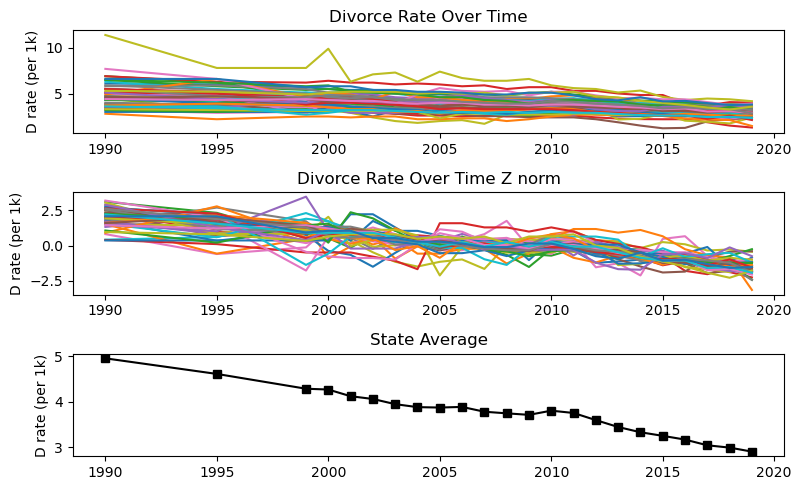

In [47]:
#Make Some Plots

fig,ax = plt.subplots(3,1,figsize=(8,5))

ax[0].plot(yearD,D.T)
ax[0].set_title('Divorce Rate Over Time')
ax[0].set_ylabel('D rate (per 1k)')

ax[1].plot(yearD,stats.zscore(D.T))
ax[1].set_title('Divorce Rate Over Time Z norm')
ax[1].set_ylabel('D rate (per 1k)')

ax[2].plot(yearD,np.mean(D,axis=0),'ks-')
ax[2].set_title('State Average')
ax[2].set_ylabel('D rate (per 1k)')

plt.tight_layout()
plt.show()

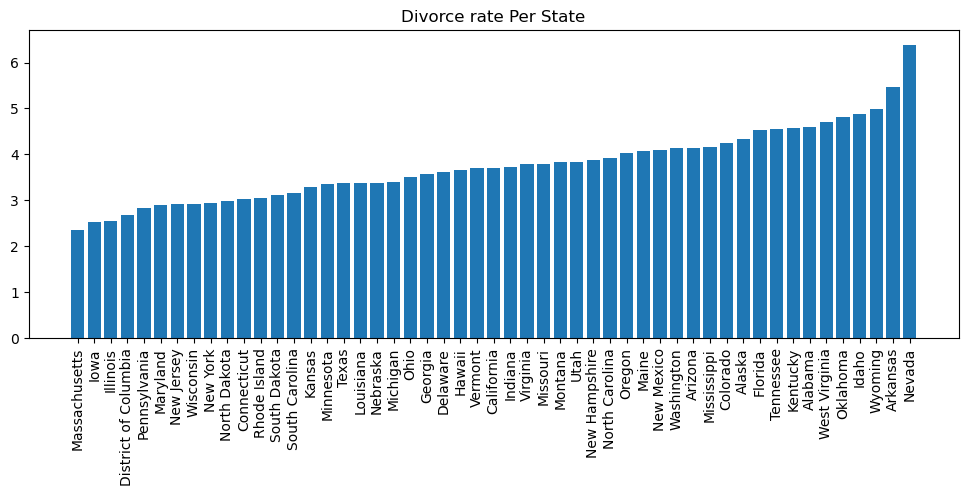

In [48]:
meanD = np.mean(D,axis=1)
sinD = np.argsort(meanD)

fig=plt.figure(figsize=(12,4))
plt.bar(stateD.iloc[sinD],meanD[sinD])
plt.xticks(rotation=90)
plt.title('Divorce rate Per State')
plt.show()


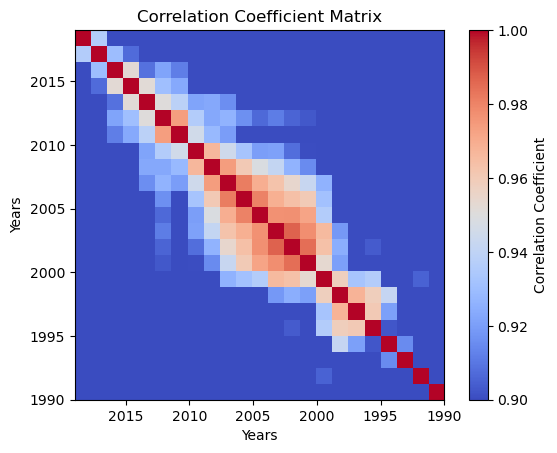

In [49]:
#Correlation Matrix
corr_matrix = np.corrcoef(D.T)

# Plotting the correlation matrix
plt.imshow(corr_matrix, vmin=0.9, vmax=1, extent=[yearD[0], yearD[-1], yearD[-1], yearD[0]], cmap='coolwarm')
plt.colorbar(label='Correlation Coefficient')
plt.xlabel('Years')
plt.ylabel('Years')
plt.title('Correlation Coefficient Matrix')
plt.show()

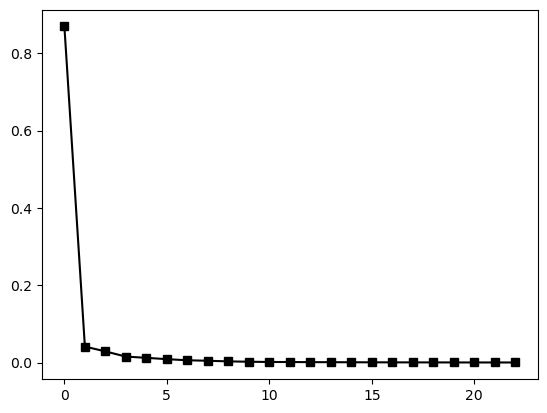

In [50]:
# PCA
pca = PCA().fit(D)
plt.plot(pca.explained_variance_ratio_,'ks-')
plt.show()

# Comparison

In [51]:
#Years
print(np.sum(yearD-yearM))

0.0


In [52]:
print(stateM.equals(stateD))

False


In [54]:
statenames = pd.concat([stateM,stateD],axis=1)
print(statenames)

              Unnamed: 0            Unnamed: 0
1                Alabama               Alabama
2                 Alaska                Alaska
3                Arizona               Arizona
4               Arkansas              Arkansas
5           California 1            California
6               Colorado              Colorado
7            Connecticut           Connecticut
8               Delaware              Delaware
9   District of Columbia  District of Columbia
10               Florida               Florida
11               Georgia               Georgia
12                Hawaii                Hawaii
13                 Idaho                 Idaho
14              Illinois              Illinois
15               Indiana               Indiana
16                  Iowa                  Iowa
17                Kansas                Kansas
18              Kentucky              Kentucky
19             Louisiana             Louisiana
20                 Maine                 Maine
21           

In [56]:
#find difference

np.where(statenames.iloc[:,0] != statenames.iloc[:,1])

(array([4], dtype=int64),)

### It just a type  error. Do not worry about that

# Inferencial Statistics

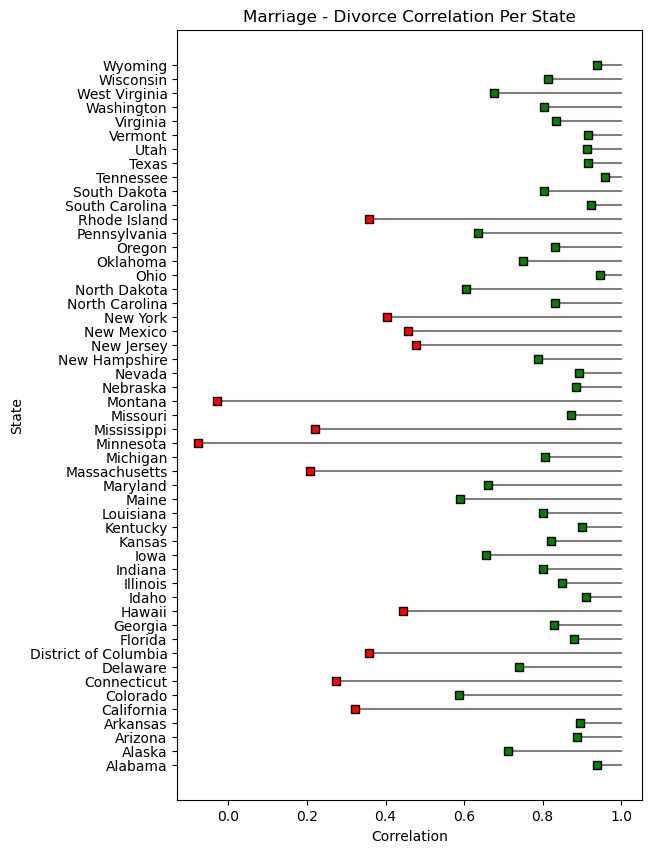

In [78]:
#correlate M and D over time per state

#Bonferroni Correlated Threshold

pvalT = 0.5/51

fig = plt.figure(figsize=(6,10))
color = 'rg'

for si in range(len(stateM)):
    #Compute Correlation
    r,p = stats.pearsonr(M[si,:],D[si,:])
    
    #plot
    plt.plot([r,1],[si,si],'-',color=[.5,.5,.5])
    plt.plot(r,si,'ks',markerfacecolor=color[bool(p<pvalT)])
    
    
plt.ylabel('State')
plt.xlabel('Correlation')
plt.title('Marriage - Divorce Correlation Per State')
plt.yticks(range(len(stateM)),labels=stateD)
plt.show()

## By Lahiru Sadakelum